# Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Import dataset

In [2]:
data1=pd.read_table('C:\MY DRIVE\Personal\dataset\All_Data\All_Data\P176.txt')

In [3]:
data1

,X,Y
0,294,30
1,247,32
2,267,37
3,358,44
4,423,47
5,311,49
6,450,56
7,534,62
8,438,68
9,697,78


In [4]:
X=data1['X']
Y=data1['Y']

In [5]:
X=np.array(X).reshape(-1,1)

In [6]:
X.shape

(27, 1)

In [7]:
X

array([[ 294],
       [ 247],
       [ 267],
       [ 358],
       [ 423],
       [ 311],
       [ 450],
       [ 534],
       [ 438],
       [ 697],
       [ 688],
       [ 630],
       [ 709],
       [ 627],
       [ 615],
       [ 999],
       [1022],
       [1015],
       [ 700],
       [ 850],
       [ 980],
       [1025],
       [1021],
       [1200],
       [1250],
       [1500],
       [1650]], dtype=int64)

In [8]:
Y=np.array(Y).reshape(-1,1)
Y.shape

(27, 1)

# Fit a linear regression model

In [9]:
lin_reg=LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

# Print Coefficients and intercept

In [10]:
lin_reg.coef_

array([[0.10536109]])

In [11]:
lin_reg.intercept_

array([14.44805858])

# Preddict for new data

In [12]:
lin_reg.predict([[250],[1200]])

array([[ 40.78833197],
       [140.88137087]])

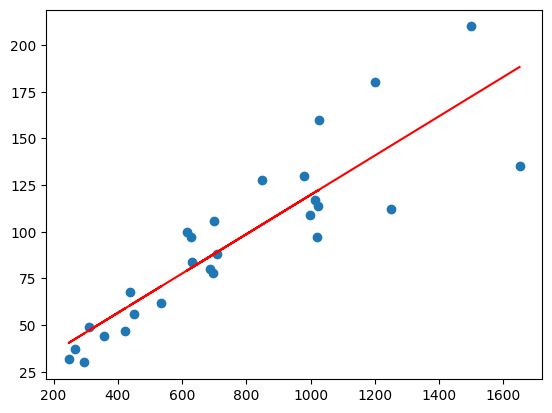

In [13]:
plt.scatter(X,Y)
plt.plot(X,lin_reg.predict(X),color='red')

# Dispaly the performance of the model

In [14]:
print(mean_squared_error(Y, lin_reg.predict(X)))

437.1875558036931


# Fit a linear regression model for multiple variable

In [16]:
dataX=pd.read_csv('C:\MY DRIVE\Personal\dataset\LR_X.csv')
dataY=pd.read_csv('C:\MY DRIVE\Personal\dataset\LR_Y.csv')

In [17]:
dataX.head()

,X1,X2,X3
0,0.26,0.08,0.28
1,0.26,0.52,0.01
2,0.85,0.60,0.14
3,0.94,0.22,0.48
4,0.53,0.05,0.76


In [18]:
dataY.head()

,Y
0,1.472
1,1.802
2,1.548
3,1.390
4,2.141


# Fit a linear regression Model

In [19]:
mlin_reg=LinearRegression()
mlin_reg.fit(dataX,dataY)

LinearRegression()

In [20]:
mlin_reg.coef_

array([[-1.2,  2.1,  2.2]])

In [21]:
mlin_reg.intercept_

array([1.])

# forecast/Predict the target for new observation

In [22]:
x_new=np.array([[-0.3,1.2,0.8]])
#x_new=x_new.reshape(-1,1)
mlin_reg.predict(x_new)

c:\my drive\personal\ds\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.64]])

In [23]:
x_new.shape

(1, 3)

In [24]:
print(mean_squared_error(dataY, mlin_reg.predict(dataX)))

5.825344895348517e-31


In [22]:
data2=pd.read_table('C:\MY DRIVE\Personal\dataset\All_Data\All_Data\P029a.txt')

In [23]:
data2.head()

,Y,X
0,1,-7
1,14,-6
2,25,-5
3,34,-4
4,41,-3


# Polynomial Regression

In [24]:
data1=pd.read_table('C:\MY DRIVE\Personal\dataset\All_Data\All_Data\P029a.txt')

In [25]:
X=data1['X']
Y=data1['Y']

# Reshape input and output

In [26]:
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)

# Transform inputs for polynomial regression

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

LinearRegression()

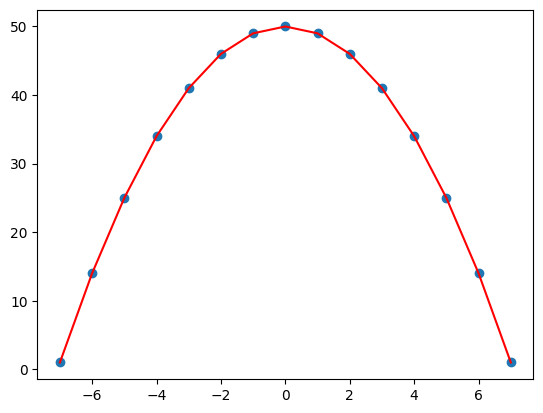

In [29]:
plt.scatter(X,Y)
plt.plot(X,lin_reg.predict(X_poly),color='red')

# Linear regression using statmodel

In [30]:
import statsmodels.api as sm

In [31]:
dataX=pd.read_csv('C:\MY DRIVE\Personal\dataset\LR_X.csv')
dataY=pd.read_csv('C:\MY DRIVE\Personal\dataset\LR_Y.csv')

In [32]:
dataX.head()

,X1,X2,X3
0,0.26,0.08,0.28
1,0.26,0.52,0.01
2,0.85,0.60,0.14
3,0.94,0.22,0.48
4,0.53,0.05,0.76


In [33]:
dataY.head()

,Y
0,1.472
1,1.802
2,1.548
3,1.390
4,2.141


In [35]:
model=sm.OLS(dataY,dataX)

In [37]:
result=model.fit()

In [38]:
result.params

X1   -0.615030
X2    2.689916
X3    2.835614
dtype: float64

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.357e+04
Date:                Sat, 27 Jul 2024   Prob (F-statistic):                        0.00
Time:                        20:16:49   Log-Likelihood:                         -277.58
No. Observations:                1000   AIC:                                      561.2
Df Residuals:                     997   BIC:                                      575.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.6150      0.030    -20.491      0.000      -0.674      -0.556
X2             2.6899      0.030     90.024      0.000       2.631       2.749
X3             2.8356      0.029     97.002      0.000       2.778       2.893
==============================================================================
Omnibus:                       15.652   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.399
Skew:                           0.027   Prob(JB):                      0.00910
Kurtosis:                       2.528   Cond. No.                         3.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
import statsmodels.formula.api as smf

In [42]:
dataX['Y']=dataY

In [43]:
dataX.head()

,X1,X2,X3,Y
0,0.26,0.08,0.28,1.472
1,0.26,0.52,0.01,1.802
2,0.85,0.60,0.14,1.548
3,0.94,0.22,0.48,1.390
4,0.53,0.05,0.76,2.141


In [44]:
results = smf.ols('Y~X1+X2+X3',data=dataX).fit()

In [45]:
results.params

Intercept    1.0
X1          -1.2
X2           2.1
X3           2.2
dtype: float64

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.091e+33
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:21:06   Log-Likelihood:                 33795.
No. Observations:                1000   AIC:                        -6.758e+04
Df Residuals:                     996   BIC:                        -6.756e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   5.05e-17   1.98e+16      0.000       1.000       1.000
X1            -1.2000   5.62e-17  -2.13e+16      0.000      -1.200      -1.200
X2             2.1000   5.62e-17   3.74e+16      0.000       2.100       2.100
X3             2.2000   5.66e-17   3.89e+16      0.000       2.200       2.200
==============================================================================
Omnibus:                        3.335   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.223
Skew:                          -0.098   Prob(JB):                        0.200
Kurtosis:                       2.804   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Gradient Descent

In [2]:
data1=pd.read_table('C:\MY DRIVE\Personal\dataset\All_Data\All_Data\P176.txt')

# Seperate dataset as input X and output Y

In [14]:
X=data1['X']
Y=data1['Y']
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)

# Scale the data. Scaling is important for Gradient Descent

In [15]:
scalerx = MinMaxScaler()
X=scalerx.fit_transform(X)
scalery = MinMaxScaler()
Y=scalery.fit_transform(Y)

In [36]:
def gradient_descent(X,Y,epochs=1000,lr=0.001):
    plt.scatter(X,Y)
    m=0
    c=0
    n=X.shape[0]
    for i in range(epochs):
        delta_m=(-2/n)*sum(X*(Y-m*X-c))
        delta_c=(-2/n)*sum(Y-m*X-c)
        m=m-lr*delta_m
        c=c-lr*delta_c
        pred=m*X+c
        plt.plot(X,pred)
    return m,c

In [37]:
def predict(m,c,x):
    y=m*x+c
    return y

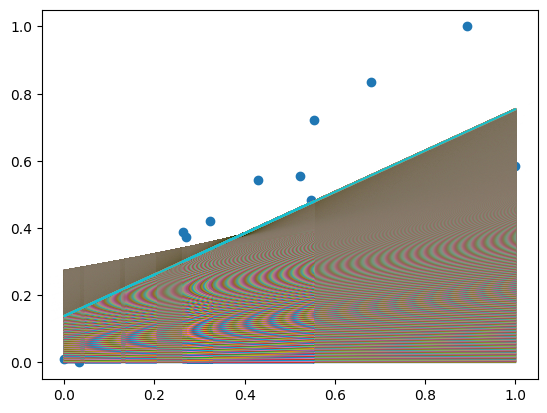

In [39]:
m,c=gradient_descent(X,Y,epochs=10000,lr=0.001)

In [40]:
print(m,c)

[0.61498949] [0.13834374]


# Predict the response for X

In [41]:
y_pred=predict(m,c,X)

# Print the error

In [43]:
print(mean_squared_error(scalery.inverse_transform(Y),scalery.inverse_transform(y_pred)))

533.4053756532992
